# Binning Data in Pandas

## `pd.cut`

>Bin values into discrete intervals.
>
>Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.

In [29]:
import pandas as pd 
import numpy as np 

arr = np.array([1,7,5,4,6,3])
pd.cut(arr, 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [30]:
binned = pd.cut(arr, 3, retbins=True)
binned

([(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
 Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]],
 array([0.994, 3.   , 5.   , 7.   ]))

In [31]:
binned[1]

array([0.994, 3.   , 5.   , 7.   ])

In [32]:
binned[0]

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('seaborn-v0_8-darkgrid')

In [34]:
raw_df = pd.read_excel("data/2018_Sales_Total.xlsx")
raw_df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55


## Manual Binning

In [35]:
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()
df.head()

,account number,name,ext price
0,141962,Herman LLC,82865.00
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92


<Axes: ylabel='Frequency'>

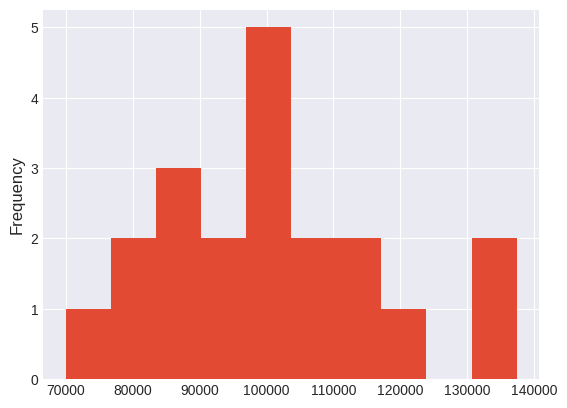

In [36]:
df['ext price'].plot(kind='hist')

## Binning by quantiles

>Signature:
>pd.qcut(
>    x,
>    q,
>    labels=None,
>    retbins: 'bool' = False,
>    precision: 'int' = 3,
>    duplicates: 'str' = 'raise',
>)
>
>Quantile-based discretization function.>
>
>Discretize variable into equal-sized buckets based on rank or based on sample quantiles. For example 1000 values for 10 quantiles would
>produce a Categorical object indicating quantile membership for each data point. 

In [37]:
df['ext price'].describe()

count        20.000000
mean     100939.216000
std       17675.097485
min       70004.360000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      137351.960000
Name: ext price, dtype: float64

In [38]:
pd.qcut(df['ext price'], q=4)

0       (70004.359, 89137.708]
1      (89137.708, 100271.535]
2       (70004.359, 89137.708]
3      (110132.552, 137351.96]
4      (89137.708, 100271.535]
5      (89137.708, 100271.535]
6       (70004.359, 89137.708]
7     (100271.535, 110132.552]
8      (110132.552, 137351.96]
9      (110132.552, 137351.96]
10     (89137.708, 100271.535]
11      (70004.359, 89137.708]
12      (70004.359, 89137.708]
13     (89137.708, 100271.535]
14    (100271.535, 110132.552]
15     (110132.552, 137351.96]
16    (100271.535, 110132.552]
17     (110132.552, 137351.96]
18    (100271.535, 110132.552]
19    (100271.535, 110132.552]
Name: ext price, dtype: category
Categories (4, interval[float64, right]): [(70004.359, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 137351.96]]

In [39]:
df['quantile_ex_1'] = pd.qcut(df['ext price'], q=4)
df['quantile_ex_2'] = pd.qcut(df['ext price'], q=10, precision=0)

df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.0, 87168.0]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]"
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70003.0, 82368.0]"
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]","(124627.0, 137352.0]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]"


## Counting

In [40]:
df['quantile_ex_1'].value_counts()

quantile_ex_1
(70004.359, 89137.708]      5
(89137.708, 100271.535]     5
(100271.535, 110132.552]    5
(110132.552, 137351.96]     5
Name: count, dtype: int64

In [41]:
pd.qcut(df['ext price'], q=4).value_counts()

ext price
(70004.359, 89137.708]      5
(89137.708, 100271.535]     5
(100271.535, 110132.552]    5
(110132.552, 137351.96]     5
Name: count, dtype: int64

In [42]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']

In [43]:
pd.qcut(df['ext price'], 
        q=[0, .2, .4, .6, .8, 1], 
       labels=bin_labels_5).head()

0     Bronze
1       Gold
2     Bronze
3    Diamond
4     Silver
Name: ext price, dtype: category
Categories (5, object): ['Bronze' < 'Silver' < 'Gold' < 'Platinum' < 'Diamond']

In [44]:
df['medal'] = pd.qcut(df['ext price'], 
        q=[0, .2, .4, .6, .8, 1], 
       labels=bin_labels_5)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,medal
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.0, 87168.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70003.0, 82368.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]","(124627.0, 137352.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver


In [45]:
df['medal'].value_counts()

medal
Bronze      4
Silver      4
Gold        4
Platinum    4
Diamond     4
Name: count, dtype: int64

## Return bin ranges

In [56]:
results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                            columns=['Threshold', 'Tier'])
results_table

,Threshold,Tier
0,70004.360,Bronze
1,87167.958,Silver
2,95908.156,Gold
3,103605.970,Platinum
4,112290.054,Diamond


In [50]:
results, bins = pd.qcut(df['ext price'], 
                             q=[0, .2, .4, .6, .8, 1], 
                             labels=bin_labels_5,
                             retbins=True
                        )

In [57]:
df.describe(include='category')

,quantile_ex_1,quantile_ex_2,medal
count,20,20,20
unique,4,10,5
top,"(70004.359, 89137.708]","(70003.0, 82368.0]",Bronze
freq,5,2,4


In [58]:
df.describe(percentiles=[0, 1/3, 2/3, 1])

,account number,ext price
count,20.000000,20.000000
mean,476998.750000,100939.216000
std,231499.208970,17675.097485
min,141962.000000,70004.360000
0%,141962.000000,70004.360000
33.3%,332759.333333,91241.493333
50%,476006.500000,100271.535000
66.7%,662511.000000,104178.580000
100%,786968.000000,137351.960000
max,786968.000000,137351.960000


# `cut`

>For distributing (unevenly) instances with arbitrary boundaries

In [59]:
df = df.drop(columns=['medal', 'quantile_ex_1', 'quantile_ex_2'])

In [60]:
pd.cut(df['ext price'], bins=4)

0      (69937.012, 86841.26]
1      (86841.26, 103678.16]
2      (69937.012, 86841.26]
3     (120515.06, 137351.96]
4      (86841.26, 103678.16]
5      (86841.26, 103678.16]
6      (69937.012, 86841.26]
7     (103678.16, 120515.06]
8     (103678.16, 120515.06]
9     (120515.06, 137351.96]
10     (86841.26, 103678.16]
11     (69937.012, 86841.26]
12     (86841.26, 103678.16]
13     (86841.26, 103678.16]
14     (86841.26, 103678.16]
15    (120515.06, 137351.96]
16     (86841.26, 103678.16]
17    (103678.16, 120515.06]
18    (103678.16, 120515.06]
19     (86841.26, 103678.16]
Name: ext price, dtype: category
Categories (4, interval[float64, right]): [(69937.012, 86841.26] < (86841.26, 103678.16] < (103678.16, 120515.06] < (120515.06, 137351.96]]

In [61]:
pd.cut(df['ext price'], bins=4).value_counts()

ext price
(86841.26, 103678.16]     9
(69937.012, 86841.26]     4
(103678.16, 120515.06]    4
(120515.06, 137351.96]    3
Name: count, dtype: int64

In [67]:
pd.cut(df['ext price'], bins=np.linspace(40000, 120000, 6)).value_counts()

ext price
(88000.0, 104000.0]     8
(104000.0, 120000.0]    4
(72000.0, 88000.0]      4
(56000.0, 72000.0]      1
(40000.0, 56000.0]      0
Name: count, dtype: int64

In [68]:
pd.interval_range(start=0, freq=10000, end=200000, closed='left')

IntervalIndex([      [0, 10000),   [10000, 20000),   [20000, 30000),
                 [30000, 40000),   [40000, 50000),   [50000, 60000),
                 [60000, 70000),   [70000, 80000),   [80000, 90000),
                [90000, 100000), [100000, 110000), [110000, 120000),
               [120000, 130000), [130000, 140000), [140000, 150000),
               [150000, 160000), [160000, 170000), [170000, 180000),
               [180000, 190000), [190000, 200000)],
              dtype='interval[int64, left]')

# Binning shortcut for `value_counts()`

In [69]:
df['ext price'].value_counts(bins=4, sort=False)

(69937.011, 86841.26]     4
(86841.26, 103678.16]     9
(103678.16, 120515.06]    4
(120515.06, 137351.96]    3
Name: count, dtype: int64